# Problem Statement
Customer churn and engagement has become one of the top issues for most banks. It costs significantly more to acquire new customers than retain existing. It is of utmost important for a bank to retain its customers.  
 
We have a data from a MeBank (Name changed) which has a data of 7124 customers. In this data-set we have a dependent variable “Exited” and various independent variables.  
  
Based on the data, build a model to predict when the customer will exit the bank. Split the data into Train and Test dataset (70:30), build the model on Train data-set and test the model on Test-dataset. Secondly provide recommendations to the bank so that they can retain the customers who are on the verge of exiting.


# Data Dictionary
<b>CustomerID</b> - Bank ID of the Customer  
<b>Surname</b> - Customer’s Surname  
<b>CreditScore</b> - Current Credit score of the customer  
<b>Geography</b> - Current country of the customer  
<b>Gender</b> - Customer’s Gender  
<b>Age</b> - Customer’s Age  
<b>Tenure</b> - Customer’s duration association with bank in years  
<b>Balance</b> - Current balance in the bank account.  
<b>Num of Dependents</b> - Number of dependents  
<b>Has Crcard</b> - 1 denotes customer has a credit card and 0 denotes customer does not have a credit card  
<b>Is Active Member</b> - 1 denotes customer is an active member and 0 denotes customer is not an active member  
<b>Estimated Salary</b> - Customer’s approx. salary  
<b>Exited</b> - 1 denotes customer has exited the bank and 0 denotes otherwise  

### Load library and import data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [0]:
churn=pd.read_csv("Churn_Modelling.csv")

### Inspect the data

In [0]:
churn.head()

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,3000,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,3000,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [0]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 14 columns):
RowNumber            7124 non-null int64
CustomerId           7124 non-null int64
Surname              7124 non-null object
Credit Score         7118 non-null float64
Geography            7120 non-null object
Gender               7116 non-null object
Age                  7124 non-null object
Tenure               7110 non-null float64
Balance              7121 non-null object
Num of Dependents    7124 non-null int64
Has CrCard           7111 non-null float64
Is Active Member     7114 non-null float64
Estimated Salary     7123 non-null float64
Exited               7124 non-null int64
dtypes: float64(5), int64(4), object(5)
memory usage: 779.3+ KB


Age and Balance variable has numeric data but data type is object. It appears some special character is present in this variable.  
Also there are missing values for some variables.

# EDA

### Removing unwanted variables

In [0]:
# remove the variables and check the data for the 10 rows 
churn = churn.drop(['RowNumber','CustomerId','Surname'], axis=1)
churn.head(10)

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,619.0,France,Female,42,2.0,3000,1,1.0,1.0,101348.88,1
1,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,502.0,France,Female,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,699.0,France,Female,39,1.0,3000,2,0.0,0.0,93826.63,0
4,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0
5,645.0,Spain,Male,44,8.0,113755.78,2,1.0,0.0,149756.71,1
6,822.0,France,Male,50,7.0,3000,2,1.0,1.0,10062.80,0
7,376.0,Germany,Female,29,4.0,115046.74,4,1.0,0.0,119346.88,1
8,501.0,France,Male,44,4.0,142051.07,2,0.0,1.0,74940.50,0
9,684.0,France,Male,27,2.0,134603.88,1,1.0,1.0,71725.73,0


Checking dimensions after removing unwanted variables,

### Summary

In [0]:
churn.describe(include="all")

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
count,7118.000000,7120,7116,7124,7110.000000,7121,7124.000000,7111.000000,7114.000000,7123.000000,7124.000000
unique,NaN,4,3,69,NaN,4638,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,37,NaN,3000,NaN,NaN,NaN,NaN,NaN
freq,NaN,3474,3791,337,NaN,2481,NaN,NaN,NaN,NaN,NaN
mean,649.687412,NaN,NaN,NaN,4.994515,NaN,1.524144,0.704542,0.495783,100489.812531,0.285935
std,97.283242,NaN,NaN,NaN,2.899323,NaN,0.608661,0.456280,0.500017,57559.538146,0.451890
min,350.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,11.580000,0.000000
25%,582.000000,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,0.000000,50992.930000,0.000000
50%,651.000000,NaN,NaN,NaN,5.000000,NaN,1.000000,1.000000,0.000000,100637.070000,0.000000
75%,717.000000,NaN,NaN,NaN,7.000000,NaN,2.000000,1.000000,1.000000,149591.645000,1.000000


In [0]:
churn.shape

(7124, 11)

### Proportion of observations in Target classes

In [0]:
# Get the proportions
churn['Exited'].value_counts(normalize=True)

0    0.714065
1    0.285935
Name: Exited, dtype: float64

### Checking for Missing values

In [0]:
# Are there any missing values ?
churn.isnull().sum()

Credit Score          6
Geography             4
Gender                8
Age                   0
Tenure               14
Balance               3
Num of Dependents     0
Has CrCard           13
Is Active Member     10
Estimated Salary      1
Exited                0
dtype: int64

There are some missing values

### Checking for inconsistencies in Balance and Age variable

In [0]:
churn.Balance.sort_values()

5870    100013.51
5280    100032.52
5611    100047.33
2129    100054.77
6755    100116.67
2650    100116.82
235     100160.75
1445    100169.51
2760    100194.44
4008    100212.13
112     100238.35
4026    100260.88
5271    100275.88
5836     100315.1
271     100337.96
6264    100368.63
1653    100374.58
3241    100375.39
4351     100421.1
4080    100431.84
962      100433.8
5407    100443.36
4819    100446.57
5279    100471.34
570     100486.18
4720    100488.92
7054    100520.92
3501    100548.67
6069    100549.43
5644    100565.94
          ...    
224      99564.22
3859     99580.13
1452     99587.43
2008     99610.92
2224     99685.06
4300     99705.69
5462     99713.87
3597     99745.95
5388      99774.5
1200     99785.28
6875     99786.07
4858      99786.2
107      99806.85
2843     99812.88
7039     99816.46
1007     99824.45
2107     99836.47
2847      99842.5
6236     99844.68
3352     99886.42
261      99906.19
3949     99906.89
2980     99945.93
2686     99948.45
2701      

There are 3 cases where '?' is present, and 3 cases where missing values are present for Balance variable.  
Summary also proves the count of missing variables.  
To confirm on the count of ?  , running value_counts()

In [0]:
churn.Balance.value_counts()

3000         2481
?               3
130170.82       2
38848.19        1
122314.39       1
97378.54        1
112972.57       1
61196.54        1
108235.91       1
126597.89       1
142631.54       1
156674.2        1
148214.36       1
98400.61        1
84719.98        1
129109.02       1
73179.34        1
88594.14        1
126418.14       1
127253.98       1
44928.88        1
127289.28       1
124601.58       1
127197.14       1
97925.11        1
93608.28        1
127940.47       1
125961.74       1
156687.1        1
120092.52       1
             ... 
120135.55       1
72783.42        1
135871.5        1
106683.52       1
94521.17        1
112045.67       1
88381.21        1
145843.82       1
107467.56       1
138296.94       1
62321.62        1
69413.44        1
106134.46       1
134464.58       1
143001.5        1
110802.03       1
136214.08       1
113909.69       1
86605.5         1
131899          1
115285.85       1
109130.96       1
131583.59       1
139183.06       1
127471.56 

This confirms there are 3 cases having ?

In [0]:
churn.Age.value_counts().sort_values()

82      1
81      1
85      1
?       1
88      1
78      2
84      2
80      2
79      4
77      5
76      7
75      7
73      9
70     12
18     13
74     14
72     14
68     15
65     15
69     15
71     19
19     21
67     24
20     25
64     27
66     28
63     31
21     39
61     42
62     43
     ... 
55     72
52     89
24     91
51    103
50    104
25    106
49    119
47    134
27    134
26    138
48    141
46    172
28    177
45    182
44    192
30    215
43    219
29    240
42    243
41    261
31    279
32    287
34    287
40    289
39    290
36    296
33    301
35    322
38    326
37    337
Name: Age, Length: 69, dtype: int64

There is 1 case where ? is present

### Replacing ? as Nan in Age and Balance variable

In [0]:
churn.Balance = churn.Balance.replace(to_replace = '?', value =np.nan)
churn.Age = churn.Age.replace(to_replace = '?', value =np.nan)

Verifying count of missing values for Age and Balance variable below:

In [0]:
churn.Balance.isnull().sum()

6

In [0]:
churn.Age.isnull().sum()

1

### Imputing missing values

Substituting the mean value for all numeric variables

In [0]:
for column in churn[['Credit Score', 'Tenure', 'Estimated Salary']]:
    mean = churn[column].mean()
    churn[column] = churn[column].fillna(mean)

In [0]:
churn.isnull().sum()

Credit Score          0
Geography             4
Gender                8
Age                   1
Tenure                0
Balance               6
Num of Dependents     0
Has CrCard           13
Is Active Member     10
Estimated Salary      0
Exited                0
dtype: int64

### Converting Object data type into Categorical

In [0]:
for column in churn[['Geography','Gender','Has CrCard','Is Active Member']]:
    if churn[column].dtype == 'object':
        churn[column] = pd.Categorical(churn[column]).codes 

In [0]:
churn.head()

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,619.0,1,1,42,2.0,3000,1,1.0,1.0,101348.88,1
1,608.0,3,1,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,502.0,1,1,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,699.0,1,1,39,1.0,3000,2,0.0,0.0,93826.63,0
4,850.0,3,1,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [0]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 11 columns):
Credit Score         7124 non-null float64
Geography            7124 non-null int8
Gender               7124 non-null int8
Age                  7123 non-null object
Tenure               7124 non-null float64
Balance              7118 non-null object
Num of Dependents    7124 non-null int64
Has CrCard           7111 non-null float64
Is Active Member     7114 non-null float64
Estimated Salary     7124 non-null float64
Exited               7124 non-null int64
dtypes: float64(5), int64(2), int8(2), object(2)
memory usage: 514.9+ KB


### Substituting the mode value for all categorical variables

In [0]:
for column in churn[['Geography','Gender','Has CrCard','Is Active Member']]:
    mode = churn[column].mode()
    churn[column] = churn[column].fillna(mode[0])

In [0]:
churn.isnull().sum()

Credit Score         0
Geography            0
Gender               0
Age                  1
Tenure               0
Balance              6
Num of Dependents    0
Has CrCard           0
Is Active Member     0
Estimated Salary     0
Exited               0
dtype: int64

Age and Balance are still not addressed. Getting the modal value

In [0]:
churn['Balance'].mode()

0    3000
dtype: object

In [0]:
churn['Age'].mode()

0    37
dtype: object

Replacing nan with modal values,

In [0]:
churn['Balance']=churn['Balance'].fillna(3000)
churn['Age']=churn['Age'].fillna(37)

In [0]:
churn.isnull().sum()

Credit Score         0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
Num of Dependents    0
Has CrCard           0
Is Active Member     0
Estimated Salary     0
Exited               0
dtype: int64

There are no more missing values.

In [0]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 11 columns):
Credit Score         7124 non-null float64
Geography            7124 non-null int8
Gender               7124 non-null int8
Age                  7124 non-null object
Tenure               7124 non-null float64
Balance              7124 non-null object
Num of Dependents    7124 non-null int64
Has CrCard           7124 non-null float64
Is Active Member     7124 non-null float64
Estimated Salary     7124 non-null float64
Exited               7124 non-null int64
dtypes: float64(5), int64(2), int8(2), object(2)
memory usage: 514.9+ KB


Age and Balance are still object, which has to be converted

### Converting Age and Balance to numeric variables

In [0]:
churn['Age']=churn['Age'].astype(str).astype(int)
churn['Balance']=churn['Balance'].astype(str).astype(float)

### Checking for Duplicates

In [0]:
# Are there any duplicates ?
dups = churn.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
churn[dups]

Number of duplicate rows = 0


,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited


There are no Duplicates

### Checking for Outliers

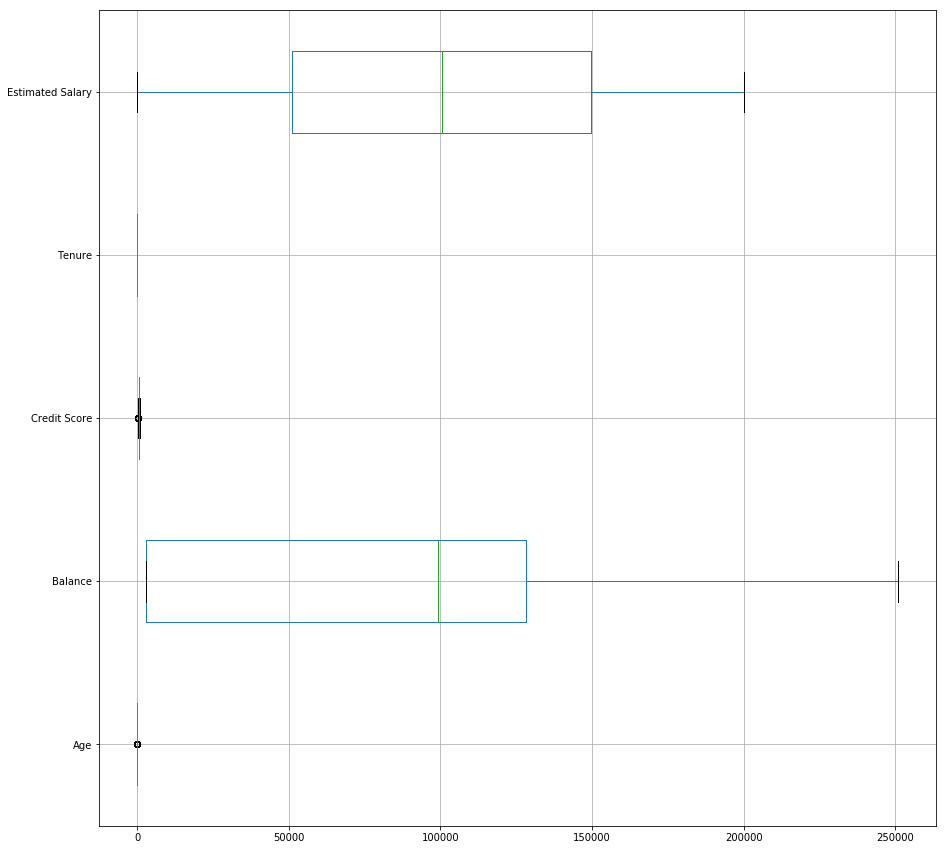

In [0]:
plt.figure(figsize=(15,15))
churn[['Age','Balance','Credit Score', 'Tenure', 'Estimated Salary']].boxplot(vert=0)

There is only 1 outlier for credit score and Age, which is also not significant

### Checking pairwise distribution of the continuous variables

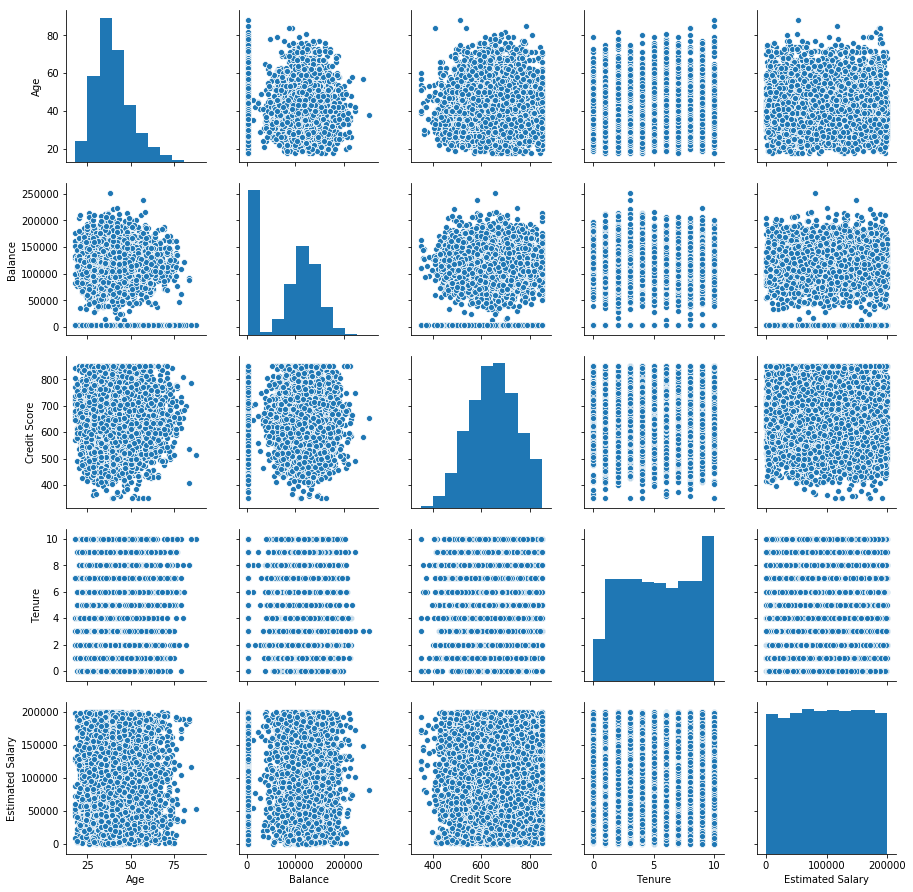

In [0]:
import seaborn as sns
sns.pairplot(churn[['Age','Balance','Credit Score', 'Tenure', 'Estimated Salary']])

### Checking for Correlations

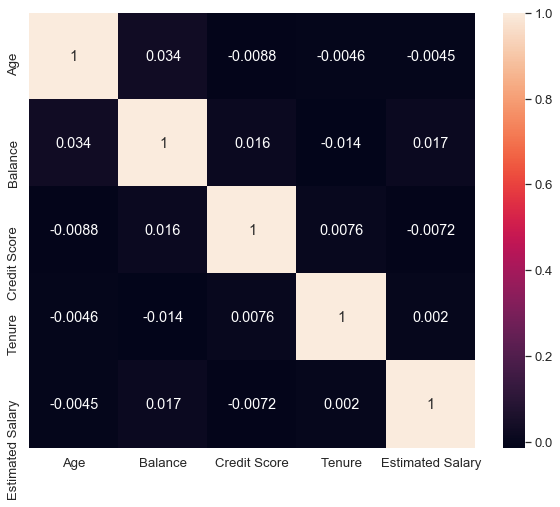

In [0]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(churn[['Age','Balance','Credit Score', 'Tenure', 'Estimated Salary']].corr(), annot=True)

There is hardly any correlation between the variables

### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Extract x and y
y = churn['Exited']
x = churn.drop(['Exited'], axis=1)

In [0]:
#split data into 70% training and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=0)

In [0]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (4986, 10)
x_test:  (2138, 10)
y_train:  (4986,)
y_test:  (2138,)


### Scaling the variables

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [0]:
#Scale the training data
x_train = sc.fit_transform(x_train)

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
x_train

array([[ 1.11002489, -0.91174366,  0.93527432, ...,  0.64690971,
         1.00080257, -0.17202534],
       [-0.39755048,  1.51535399,  0.93527432, ...,  0.64690971,
        -0.99919808,  1.00587501],
       [ 0.31493377, -0.91174366, -1.0423668 , ..., -1.54581077,
        -0.99919808, -0.52500701],
       ...,
       [-1.53339493, -0.91174366,  0.93527432, ...,  0.64690971,
        -0.99919808,  0.31871379],
       [ 1.70892469, -0.91174366,  0.93527432, ...,  0.64690971,
        -0.99919808,  0.02897279],
       [-0.26331431,  0.30180516, -1.0423668 , ...,  0.64690971,
        -0.99919808,  0.32500445]])

In [0]:
# Apply the transformation on the test data
x_test = sc.transform(x_test)

C:\Users\Win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int8, int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
x_test

array([[ 0.54210266, -0.91174366,  0.93527432, ...,  0.64690971,
         1.00080257,  0.92362926],
       [ 0.35623721, -0.91174366,  0.93527432, ...,  0.64690971,
         1.00080257,  1.45573826],
       [ 1.31654206,  1.51535399,  0.93527432, ..., -1.54581077,
         1.00080257, -0.62338384],
       ...,
       [-0.93449513, -0.91174366, -1.0423668 , ..., -1.54581077,
        -0.99919808, -0.17491885],
       [-0.44917977, -0.91174366,  0.93527432, ..., -1.54581077,
        -0.99919808, -1.56005347],
       [ 0.26330448, -0.91174366, -1.0423668 , ...,  0.64690971,
        -0.99919808, -1.65237299]])

### Building Neural Network Model

In [0]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [0]:
# Fit the model on the training data
clf.fit(x_train, y_train)

Iteration 1, loss = 0.70312864
Iteration 2, loss = 0.64672009
Iteration 3, loss = 0.61042850
Iteration 4, loss = 0.58944778
Iteration 5, loss = 0.57647133
Iteration 6, loss = 0.56707734
Iteration 7, loss = 0.55992303
Iteration 8, loss = 0.55395923
Iteration 9, loss = 0.54883851
Iteration 10, loss = 0.54434185
Iteration 11, loss = 0.54032266
Iteration 12, loss = 0.53672432
Iteration 13, loss = 0.53339894
Iteration 14, loss = 0.53040369
Iteration 15, loss = 0.52771906
Iteration 16, loss = 0.52514180
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=21, shuffle=True, solver='sgd', tol=0.01,
       validation_fraction=0.1, verbose=True, warm_start=False)

### Predicting training data

In [0]:
# use the model to predict the training data
y_pred = clf.predict(x_train)

### Evaluating model performance on training data

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
confusion_matrix(y_train,y_pred)

array([[3494,   81],
       [1174,  237]], dtype=int64)

In [0]:
clf.score(x_train,y_train)

0.7482952266345768

In [0]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      3575
           1       0.75      0.17      0.27      1411

   micro avg       0.75      0.75      0.75      4986
   macro avg       0.75      0.57      0.56      4986
weighted avg       0.75      0.75      0.69      4986



AUC: 0.750


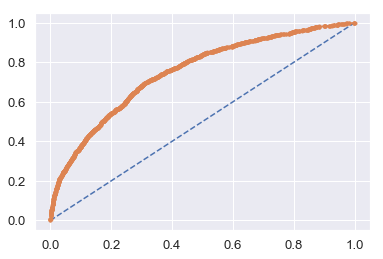

In [0]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Predicting Test Data and comparing model performance

In [0]:
y_pred = clf.predict(x_test)

In [0]:
confusion_matrix(y_test, y_pred)

array([[1473,   39],
       [ 517,  109]], dtype=int64)

In [0]:
clf.score(x_test,y_test)

0.7399438727782974

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      1512
           1       0.74      0.17      0.28       626

   micro avg       0.74      0.74      0.74      2138
   macro avg       0.74      0.57      0.56      2138
weighted avg       0.74      0.74      0.68      2138



AUC: 0.759


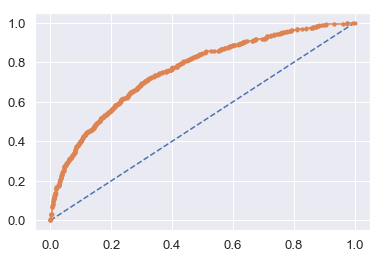

In [0]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Model Tuning through Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [0]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [100, 200, 300, 500], 'max_iter': [5000, 2500, 7000, 6000], 'solver': ['sgd', 'adam'], 'tol': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
grid_search.best_params_

{'hidden_layer_sizes': 500, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [0]:
best_grid = grid_search.best_estimator_

In [0]:
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=500, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.01,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [0]:
confusion_matrix(y_train,ytrain_predict)

array([[3417,  158],
       [ 701,  710]], dtype=int64)

In [0]:
clf.score(x_train,y_train)

0.7482952266345768

In [0]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3575
           1       0.82      0.50      0.62      1411

   micro avg       0.83      0.83      0.83      4986
   macro avg       0.82      0.73      0.76      4986
weighted avg       0.83      0.83      0.81      4986



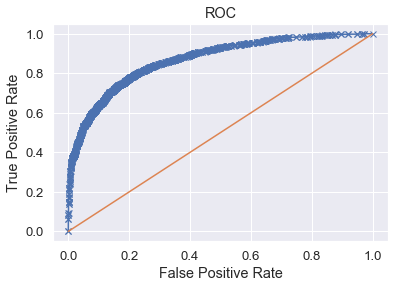

Area under Curve is 0.729496711651212


In [0]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict(x_train)))

In [0]:
confusion_matrix(y_test,ytest_predict)

array([[1428,   84],
       [ 315,  311]], dtype=int64)

In [0]:
clf.score(x_test,y_test)

0.7399438727782974

In [0]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1512
           1       0.79      0.50      0.61       626

   micro avg       0.81      0.81      0.81      2138
   macro avg       0.80      0.72      0.74      2138
weighted avg       0.81      0.81      0.80      2138



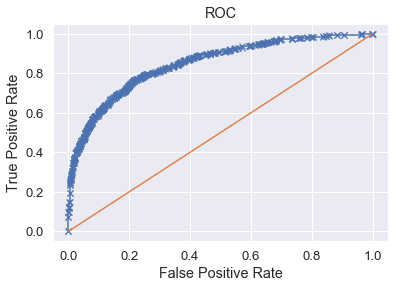

Area under Curve is 0.7206247781327654


In [0]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict(x_test)))

## Conclusion

AUC on the training data is 73% and on test data is 72%. The precision and recall metrics are also almost similar between training and test set, which indicates no overfitting or underfitting has happened. 
  
best_grid model has better improved performance over the initial clf model as the sensitivity was much lesser in the initial model.

The Overall model performance is moderate enough to start predicting if any new customer will churn or not. 